In [2]:
import pandas as pd
import talib
data = pd.read_excel('sz50.xlsx',sheet_name=,index_col='datetime')
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


In [6]:
closeArray = data['600036.XSHG']['close'].values
print(type(closeArray))
ma10=talib.SMA(closeArray,timeperiod=10)
print(ma10[ma10.size-5:ma10.size])

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


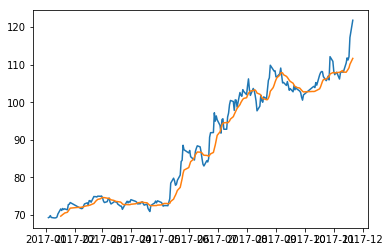

In [11]:
import matplotlib.pyplot as plt
ma10Series = pd.DataFrame(ma10,index=data['600036.XSHG'].index)
plt.plot(data['600036.XSHG'].index,data['600036.XSHG']['close'])
plt.plot(ma10Series.index,ma10Series)
plt.show()

In [18]:
import numpy as np
panel_data={}
for name in data.keys():
    closeArray = data[name]['close'].values
    each_df=pd.DataFrame()
    each_df['datatime']=data[name].index
    each_df['MACD'],each_df['MACDsignal'],each_df['MACDhist'] = np.array(talib.MACD(closeArray,fastperiod=6,slowperiod=12,signalperiod=9))
    panel_data[name]=each_df
panel=pd.Panel(panel_data)
panel_re=panel.transpose(2,1,0,copy=True)
print(panel_re.major_xs(33))

KeyError: 'close'